In [1]:
import yfinance as yf
import pandas as pd
#Added by us
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Do not truncate column text
pd.set_option("display.expand_frame_repr", False)  # Avoid line wrapping

# Fetch the list of S&P 500 companies
sp500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_df= sp500_table[0]
print(sp500_df.head())

#Get the shortcuts (tickers) of the companies for API
tickers = sp500_df['Symbol'].tolist()

#change tickers 'BF.B' and 'BRK.B'
tickers = [w.replace('BF.B', 'BF-B') for w in tickers]
tickers = [w.replace('BRK.B', 'BRK-B') for w in tickers]





  Symbol             Security             GICS Sector               GICS Sub-Industry    Headquarters Location  Date added      CIK      Founded
0    MMM                   3M             Industrials        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04    66740         1902
1    AOS          A. O. Smith             Industrials               Building Products     Milwaukee, Wisconsin  2017-07-26    91142         1916
2    ABT  Abbott Laboratories             Health Care           Health Care Equipment  North Chicago, Illinois  1957-03-04     1800         1888
3   ABBV               AbbVie             Health Care                   Biotechnology  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)
4    ACN            Accenture  Information Technology  IT Consulting & Other Services          Dublin, Ireland  2011-07-06  1467373         1989


In [2]:
# Download the data
sp500_data = yf.download(tickers, start="1900-01-01", end="2025-03-01")

print(sp500_data.head())
print(sp500_data.tail())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  503 of 503 completed


Price      Close                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [3]:
columns = sp500_data.columns
print(columns)

# Get all stock tickers from the second level
tickers = sp500_data.columns.get_level_values(1).unique()

# Calculate percentage change and add as new column family
for ticker in tickers:
    # Get the close price for this ticker
    close_price = sp500_data[('Close', ticker)]
    # Calculate pct change and assign to new column family
    sp500_data[('pct_change', ticker)] = close_price.pct_change()

#put pct_change columns at the front
sp500_data = sp500_data[sp500_data.columns.sortlevel(level=1)[0]]

# Check the updated columns
print(sp500_data.columns)
print(sp500_data.tail(10))
sp500_data.head()


MultiIndex([( 'Close',    'A'),
            ( 'Close', 'AAPL'),
            ( 'Close', 'ABBV'),
            ( 'Close', 'ABNB'),
            ( 'Close',  'ABT'),
            ( 'Close', 'ACGL'),
            ( 'Close',  'ACN'),
            ( 'Close', 'ADBE'),
            ( 'Close',  'ADI'),
            ( 'Close',  'ADM'),
            ...
            ('Volume',  'WTW'),
            ('Volume',   'WY'),
            ('Volume', 'WYNN'),
            ('Volume',  'XEL'),
            ('Volume',  'XOM'),
            ('Volume',  'XYL'),
            ('Volume',  'YUM'),
            ('Volume',  'ZBH'),
            ('Volume', 'ZBRA'),
            ('Volume',  'ZTS')],
           names=['Price', 'Ticker'], length=2515)


C:\Users\kobra\AppData\Local\Temp\ipykernel_24048\2454462542.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_data[('pct_change', ticker)] = close_price.pct_change()
C:\Users\kobra\AppData\Local\Temp\ipykernel_24048\2454462542.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_data[('pct_change', ticker)] = close_price.pct_change()
C:\Users\kobra\AppData\Local\Temp\ipykernel_24048\2454462542.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

MultiIndex([(     'Close',    'A'),
            (      'High',    'A'),
            (       'Low',    'A'),
            (      'Open',    'A'),
            (    'Volume',    'A'),
            ('pct_change',    'A'),
            (     'Close', 'AAPL'),
            (      'High', 'AAPL'),
            (       'Low', 'AAPL'),
            (      'Open', 'AAPL'),
            ...
            (       'Low', 'ZBRA'),
            (      'Open', 'ZBRA'),
            (    'Volume', 'ZBRA'),
            ('pct_change', 'ZBRA'),
            (     'Close',  'ZTS'),
            (      'High',  'ZTS'),
            (       'Low',  'ZTS'),
            (      'Open',  'ZTS'),
            (    'Volume',  'ZTS'),
            ('pct_change',  'ZTS')],
           names=['Price', 'Ticker'], length=3018)
Price            Close        High         Low        Open     Volume pct_change       Close        High         Low        Open      Volume pct_change       Close        High         Low        Open      Volume 

Price      Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High  Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change     Close      High       Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High  Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High  Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change     Close      High       Low      Open  Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close  High   Low  Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change     Close      High       Low      Open  Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High  Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close  High   Low  Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change Close High Low Open Volume pct_change     Close      Hig

In [4]:
# Transform MultiIndex DataFrame into tidy format
sp500_tidy = sp500_data.stack(level=1).reset_index()



# Display the transformed DataFrame
print(sp500_tidy.head())
print(sp500_tidy.tail())
sp500_tidy.columns

C:\Users\kobra\AppData\Local\Temp\ipykernel_24048\19039251.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  sp500_tidy = sp500_data.stack(level=1).reset_index()


Price       Date Ticker     Close      High       Low      Open    Volume  pct_change
0     1962-01-02    AEP  0.923928  0.945806  0.923928  0.000000    5800.0         NaN
1     1962-01-02     BA  0.190931  0.194272  0.190931  0.194272  352350.0         NaN
2     1962-01-02    CAT  0.469586  0.474160  0.465013  0.469586  163200.0         NaN
3     1962-01-02    CNP  0.290678  0.292888  0.290678  0.000000   13879.0         NaN
4     1962-01-02    CVX  0.321829  0.321829  0.316744  0.000000  105840.0         NaN
Price         Date Ticker       Close        High         Low        Open     Volume  pct_change
4300428 2025-02-28    XYL  130.889999  131.160004  128.729996  129.669998  2510800.0    0.016385
4300429 2025-02-28    YUM  156.369995  156.559998  153.940002  154.169998  3003400.0    0.017305
4300430 2025-02-28    ZBH  104.320000  105.559998  102.419998  104.809998  2813600.0    0.002595
4300431 2025-02-28   ZBRA  315.049988  315.309998  307.160004  310.049988   611600.0    0.013022

Index(['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume',
       'pct_change'],
      dtype='object', name='Price')

In [5]:
sp500_tidy.drop(['High', 'Low', 'Open'], inplace=True, axis=1)
print(sp500_tidy.head())
print(sp500_tidy.tail())


Price       Date Ticker     Close    Volume  pct_change
0     1962-01-02    AEP  0.923928    5800.0         NaN
1     1962-01-02     BA  0.190931  352350.0         NaN
2     1962-01-02    CAT  0.469586  163200.0         NaN
3     1962-01-02    CNP  0.290678   13879.0         NaN
4     1962-01-02    CVX  0.321829  105840.0         NaN
Price         Date Ticker       Close     Volume  pct_change
4300428 2025-02-28    XYL  130.889999  2510800.0    0.016385
4300429 2025-02-28    YUM  156.369995  3003400.0    0.017305
4300430 2025-02-28    ZBH  104.320000  2813600.0    0.002595
4300431 2025-02-28   ZBRA  315.049988   611600.0    0.013022
4300432 2025-02-28    ZTS  167.240005  3333300.0    0.013699


In [6]:
print(sp500_tidy.shape)

#get rows where sp500_tidy['Volume'] is NaN
nan_rows = sp500_tidy[sp500_tidy['Volume'].isna()]
print(nan_rows.shape)
print(nan_rows.value_counts())
print(nan_rows.head())
print(nan_rows.tail())
print(nan_rows['Ticker'].value_counts())


(4300433, 5)
(121, 5)
Series([], Name: count, dtype: int64)
Price       Date Ticker  Close  Volume  pct_change
63919 1972-06-06   HUBB    NaN     NaN         0.0
63960 1972-06-07   HUBB    NaN     NaN         0.0
64001 1972-06-08   HUBB    NaN     NaN         0.0
64042 1972-06-09   HUBB    NaN     NaN         0.0
64083 1972-06-12   HUBB    NaN     NaN         0.0
Price        Date Ticker  Close  Volume  pct_change
71159  1973-02-14   HUBB    NaN     NaN         0.0
71202  1973-02-15   HUBB    NaN     NaN         0.0
71245  1973-02-16   HUBB    NaN     NaN         0.0
71288  1973-02-20   HUBB    NaN     NaN         0.0
166585 1977-08-08   HUBB    NaN     NaN         0.0
Ticker
HUBB    121
Name: count, dtype: int64


In [7]:
# drop rows where sp500_tidy['Volume'] is NaN
print(sp500_tidy.shape)
sp500_tidy = sp500_tidy.dropna(subset=['Volume'])
print(sp500_tidy.shape)

(4300433, 5)
(4300312, 5)


In [8]:
sp500_tidy.describe()

Price,Date,Close,Volume,pct_change
count,4300312,4.300312e+06,4.300312e+06,4.299809e+06
mean,2004-10-22 09:17:22.470964992,4.908092e+01,6.352209e+06,7.566390e-04
min,1962-01-02 00:00:00,1.536858e-03,0.000000e+00,-7.824933e-01
25%,1995-01-23 00:00:00,4.205931e+00,4.909000e+05,-9.043175e-03
50%,2006-11-30 00:00:00,1.721045e+01,1.463000e+06,0.000000e+00
75%,2016-06-23 00:00:00,4.739076e+01,3.894100e+06,1.011326e-02
max,2025-02-28 00:00:00,9.924400e+03,9.230856e+09,2.633333e+01
std,NaN,1.537161e+02,4.028466e+07,2.663752e-02


In [9]:
# Define the tickers
tickers = {
    'Dow Jones': '^DJI',
    'NASDAQ': '^IXIC',
    'S&P 500': '^GSPC',
    '2-Year Treasury Yield': '^IRX',
    '5-Year Treasury Yield': '^FVX',
    '10-Year Treasury Yield': '^TNX',
    'Gold Futures': 'GC=F',
    'Crude Oil Futures': 'CL=F'
}

# Download the data
data = yf.download(list(tickers.values()), start="1900-01-01", end="2025-03-01")
print(data.head())
print(data.tail())


[*********************100%***********************]  8 of 8 completed

Price      Close                                           High                                            Low                                           Open                                           Volume                                     
Ticker      CL=F GC=F ^DJI ^FVX      ^GSPC ^IRX ^IXIC ^TNX CL=F GC=F ^DJI ^FVX      ^GSPC ^IRX ^IXIC ^TNX CL=F GC=F ^DJI ^FVX      ^GSPC ^IRX ^IXIC ^TNX CL=F GC=F ^DJI ^FVX      ^GSPC ^IRX ^IXIC ^TNX   CL=F GC=F ^DJI ^FVX ^GSPC ^IRX ^IXIC ^TNX
Date                                                                                                                                                                                                                                               
1927-12-30   NaN  NaN  NaN  NaN  17.660000  NaN   NaN  NaN  NaN  NaN  NaN  NaN  17.660000  NaN   NaN  NaN  NaN  NaN  NaN  NaN  17.660000  NaN   NaN  NaN  NaN  NaN  NaN  NaN  17.660000  NaN   NaN  NaN    NaN  NaN  NaN  NaN   0.0  NaN   NaN  NaN
1928-01-03   NaN  NaN  N

In [10]:
# Transform MultiIndex DataFrame into tidy format
exo_gen = data.stack(level=1).reset_index()

# Rename columns
exo_gen.columns = ['Date', 'Ticker','Close', 'High', 'Low', 'Open', 'Volume']

# Display the transformed DataFrame
print(sp500_tidy.head())
print(sp500_tidy.tail())

Price       Date Ticker     Close    Volume  pct_change
0     1962-01-02    AEP  0.923928    5800.0         NaN
1     1962-01-02     BA  0.190931  352350.0         NaN
2     1962-01-02    CAT  0.469586  163200.0         NaN
3     1962-01-02    CNP  0.290678   13879.0         NaN
4     1962-01-02    CVX  0.321829  105840.0         NaN
Price         Date Ticker       Close     Volume  pct_change
4300428 2025-02-28    XYL  130.889999  2510800.0    0.016385
4300429 2025-02-28    YUM  156.369995  3003400.0    0.017305
4300430 2025-02-28    ZBH  104.320000  2813600.0    0.002595
4300431 2025-02-28   ZBRA  315.049988   611600.0    0.013022
4300432 2025-02-28    ZTS  167.240005  3333300.0    0.013699


C:\Users\kobra\AppData\Local\Temp\ipykernel_24048\2445350626.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  exo_gen = data.stack(level=1).reset_index()


In [11]:
# redo the dataframe for exogenous variables by having only one row per date
exo_gen = exo_gen.pivot(index='Date', columns='Ticker', values='Close')
exo_gen = exo_gen.reset_index()
print(exo_gen.head())
print(exo_gen.tail())

print(exo_gen.shape)
#get rid of rows with NaN values
nan_rows = exo_gen[exo_gen.isna().any(axis=1)]
print(nan_rows.shape)
#drop rows with NaN values


Ticker       Date  CL=F  GC=F  ^DJI  ^FVX      ^GSPC  ^IRX  ^IXIC  ^TNX
0      1927-12-30   NaN   NaN   NaN   NaN  17.660000   NaN    NaN   NaN
1      1928-01-03   NaN   NaN   NaN   NaN  17.760000   NaN    NaN   NaN
2      1928-01-04   NaN   NaN   NaN   NaN  17.719999   NaN    NaN   NaN
3      1928-01-05   NaN   NaN   NaN   NaN  17.549999   NaN    NaN   NaN
4      1928-01-06   NaN   NaN   NaN   NaN  17.660000   NaN    NaN   NaN
Ticker       Date       CL=F         GC=F          ^DJI   ^FVX        ^GSPC   ^IRX         ^IXIC   ^TNX
24436  2025-02-24  70.699997  2947.899902  43461.210938  4.230  5983.250000  4.190  19286.929688  4.393
24437  2025-02-25  68.930000  2904.500000  43621.160156  4.133  5955.250000  4.182  19026.390625  4.298
24438  2025-02-26  68.620003  2916.800049  43433.121094  4.077  5956.060059  4.193  19075.259766  4.249
24439  2025-02-27  70.349998  2883.199951  43239.500000  4.103  5861.569824  4.195  18544.419922  4.285
24440  2025-02-28  69.760002  2836.800049  43840

In [12]:
#rename the columns with the tickers dict and than start for examlpe "Close Dow Jones" instead of "^DJI", but the dict is reversed
tickers_reversed = {value: key for key, value in tickers.items()}
exo_gen = exo_gen.rename(columns=tickers_reversed)

#add the term "Close" to the columns, except for the first column
exo_gen.columns = exo_gen.columns.where(exo_gen.columns == 'Date', 'Close ' + exo_gen.columns)
print(exo_gen.head())
print(exo_gen.tail())

#print the first occurence where 'Close Dow Jones' is not NaN
print(exo_gen[exo_gen['Close Dow Jones'].notna()].head(5))

Ticker       Date  Close Crude Oil Futures  Close Gold Futures  Close Dow Jones  Close 5-Year Treasury Yield  Close S&P 500  Close 2-Year Treasury Yield  Close NASDAQ  Close 10-Year Treasury Yield
0      1927-12-30                      NaN                 NaN              NaN                          NaN      17.660000                          NaN           NaN                           NaN
1      1928-01-03                      NaN                 NaN              NaN                          NaN      17.760000                          NaN           NaN                           NaN
2      1928-01-04                      NaN                 NaN              NaN                          NaN      17.719999                          NaN           NaN                           NaN
3      1928-01-05                      NaN                 NaN              NaN                          NaN      17.549999                          NaN           NaN                           NaN
4      1928-01-

In [13]:
# Merge the two DataFrames
merged = pd.merge(sp500_tidy, exo_gen, on='Date', how='left')
print(merged.head())
print(merged.tail())
print(merged.shape)

#count for each column the number of NaN values
print(merged.isna().sum())

        Date Ticker     Close    Volume  pct_change  Close Crude Oil Futures  Close Gold Futures  Close Dow Jones  Close 5-Year Treasury Yield  Close S&P 500  Close 2-Year Treasury Yield  Close NASDAQ  Close 10-Year Treasury Yield
0 1962-01-02    AEP  0.923928    5800.0         NaN                      NaN                 NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06
1 1962-01-02     BA  0.190931  352350.0         NaN                      NaN                 NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06
2 1962-01-02    CAT  0.469586  163200.0         NaN                      NaN                 NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06
3 1962-01-02    CNP  0.290678   13879.0         NaN                      NaN

In [14]:
merged.drop(columns=['Close Gold Futures','Close Crude Oil Futures'], inplace=True)
print(merged.isna().sum())


Date                                 0
Ticker                               0
Close                                0
Volume                               0
pct_change                         503
Close Dow Jones                 861291
Close 5-Year Treasury Yield      19610
Close S&P 500                        0
Close 2-Year Treasury Yield      19610
Close NASDAQ                     55427
Close 10-Year Treasury Yield     19610
dtype: int64


In [15]:
oil_data = pd.read_csv('DCOILWTICO.csv')
oil_data.dropna(inplace=True)
print(oil_data.head())  
print(oil_data.tail())
print(oil_data.shape)
print('################################################################')
print("sp500_tidy Date type:", sp500_tidy['Date'].dtype)
print("oil_data Date type:", oil_data['Date'].dtype)

#change to datetime64[ns] for oil_data
oil_data['Date'] = pd.to_datetime(oil_data['Date'])
#rename to 'price Crude Oil'
oil_data.rename(columns={'DCOILWTICO': 'price Crude Oil'}, inplace=True)
print("oil_data Date type:", oil_data['Date'].dtype)

         Date  DCOILWTICO
0  1986-01-02       25.56
1  1986-01-03       26.00
2  1986-01-06       26.53
3  1986-01-07       25.85
4  1986-01-08       25.87
             Date  DCOILWTICO
10208  2025-02-18       72.21
10209  2025-02-19       72.58
10210  2025-02-20       72.88
10211  2025-02-21       70.72
10212  2025-02-24       71.06
(9856, 2)
################################################################
sp500_tidy Date type: datetime64[ns]
oil_data Date type: object
oil_data Date type: datetime64[ns]


In [16]:
# Merge the two DataFrames
merged = pd.merge(merged, oil_data, on='Date', how='left')
print(merged.head())
print(merged.tail())
print(merged.shape)

#count for each column the number of NaN values
print(merged.isna().sum())

        Date Ticker     Close    Volume  pct_change  Close Dow Jones  Close 5-Year Treasury Yield  Close S&P 500  Close 2-Year Treasury Yield  Close NASDAQ  Close 10-Year Treasury Yield  price Crude Oil
0 1962-01-02    AEP  0.923928    5800.0         NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06              NaN
1 1962-01-02     BA  0.190931  352350.0         NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06              NaN
2 1962-01-02    CAT  0.469586  163200.0         NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06              NaN
3 1962-01-02    CNP  0.290678   13879.0         NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06   

In [17]:
#load csv with ; as separator
Gold_data = pd.read_csv('Gold_Prices.csv', sep=';')
Gold_data.dropna(inplace=True)
#renname USD to Dollar per ounce gold
Gold_data = Gold_data.rename(columns={'USD': '$ per ounce gold'})
print(Gold_data.head())
print(Gold_data.tail())
print(Gold_data.shape)

         Date $ per ounce gold
0  29.12.1978            226,0
1  01.01.1979            226,0
2  02.01.1979            226,8
3  03.01.1979            218,6
4  04.01.1979            223,2
             Date $ per ounce gold
12036  17.02.2025          2.900,6
12037  18.02.2025          2.927,1
12038  19.02.2025          2.936,9
12039  20.02.2025          2.932,1
12040  21.02.2025          2.934,2
(12041, 2)


In [18]:
#change to datetime64[ns] for Gold_data
Gold_data['Date'] = pd.to_datetime(Gold_data['Date'])
print("Gold_data type:", Gold_data['Date'].dtype)
# Convert European number format (2.900,6) to standard decimal format (2900.6)
Gold_data['$ per ounce gold'] = Gold_data['$ per ounce gold'].str.replace('.', '', regex=False)  # Remove thousand separators
Gold_data['$ per ounce gold'] = Gold_data['$ per ounce gold'].str.replace(',', '.', regex=False)  # Replace decimal comma with point
Gold_data['$ per ounce gold'] = Gold_data['$ per ounce gold'].astype(float)  # Convert to float only once
# rename'$ per ounce gold column to Close Gold Price
Gold_data.rename(columns={'$ per ounce gold': 'Close_Gold_Price'}, inplace=True)
print(Gold_data.head())
print(Gold_data.tail())

Gold_data type: datetime64[ns]
        Date  Close_Gold_Price
0 1978-12-29             226.0
1 1979-01-01             226.0
2 1979-01-02             226.8
3 1979-01-03             218.6
4 1979-01-04             223.2
            Date  Close_Gold_Price
12036 2025-02-17            2900.6
12037 2025-02-18            2927.1
12038 2025-02-19            2936.9
12039 2025-02-20            2932.1
12040 2025-02-21            2934.2


C:\Users\kobra\AppData\Local\Temp\ipykernel_24048\2928463678.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Gold_data['Date'] = pd.to_datetime(Gold_data['Date'])


In [19]:
#left merge with Gold_data
merged = pd.merge(merged, Gold_data, on='Date', how='left')
print(merged.head())
print(merged.tail())
print(merged.shape)

#count for each column the number of NaN values
print(merged.isna().sum())

        Date Ticker     Close    Volume  pct_change  Close Dow Jones  Close 5-Year Treasury Yield  Close S&P 500  Close 2-Year Treasury Yield  Close NASDAQ  Close 10-Year Treasury Yield  price Crude Oil  Close_Gold_Price
0 1962-01-02    AEP  0.923928    5800.0         NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06              NaN               NaN
1 1962-01-02     BA  0.190931  352350.0         NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06              NaN               NaN
2 1962-01-02    CAT  0.469586  163200.0         NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06              NaN               NaN
3 1962-01-02    CNP  0.290678   13879.0         NaN              NaN                         3.88      70.959999    

In [20]:
nan_rows = merged[merged['price Crude Oil'].isna()]

# sort by date, count groups of NaN values
nan_rows = nan_rows.sort_values(by='Date')
nan_rows = nan_rows.groupby('Date').size()
#print(nan_rows)
#give each entry the number 1
nan_rows = nan_rows.apply(lambda x: 1)
#print(nan_rows)
#grpup by year and sum the number of NaN values
nan_rows = nan_rows.groupby(nan_rows.index.year).sum()
print(nan_rows)



Date
1962    252
1963    251
1964    253
1965    252
1966    252
1967    251
1968    226
1969    250
1970    254
1971    253
1972    251
1973    252
1974    253
1975    253
1976    253
1977    252
1978    252
1979    253
1980    253
1981    253
1982    253
1983    253
1984    253
1985    252
1986      2
1987      1
1993      3
1994      1
1995      1
1997      1
1998      1
1999      1
2000      2
2001      2
2002      2
2003      2
2004      3
2005      1
2006      2
2017      1
2018      3
2019      2
2020      1
2021      1
2023      2
2024      2
2025      4
dtype: int64


In [21]:
print(merged.head())
print(merged.tail())
print(merged.shape)
merged.dropna(inplace=True)
print(merged.shape)
print(merged.head())
print(merged.tail())


        Date Ticker     Close    Volume  pct_change  Close Dow Jones  Close 5-Year Treasury Yield  Close S&P 500  Close 2-Year Treasury Yield  Close NASDAQ  Close 10-Year Treasury Yield  price Crude Oil  Close_Gold_Price
0 1962-01-02    AEP  0.923928    5800.0         NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06              NaN               NaN
1 1962-01-02     BA  0.190931  352350.0         NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06              NaN               NaN
2 1962-01-02    CAT  0.469586  163200.0         NaN              NaN                         3.88      70.959999                          2.7           NaN                          4.06              NaN               NaN
3 1962-01-02    CNP  0.290678   13879.0         NaN              NaN                         3.88      70.959999    

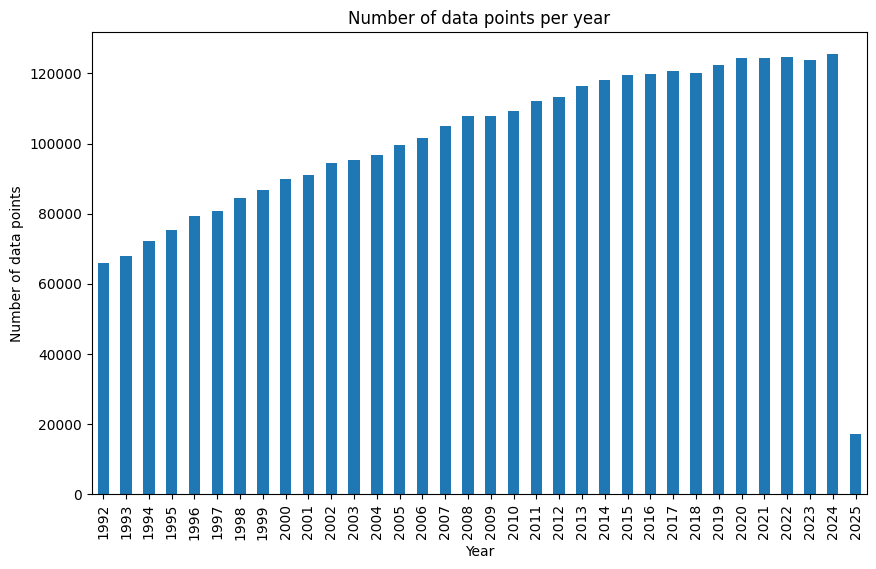

In [22]:
#plot the data points per year
import matplotlib.pyplot as plt

# Plot the number of data points per year
plt.figure(figsize=(10, 6))
merged['Date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of data points')
plt.title('Number of data points per year')
plt.show()

In [23]:
VIX = pd.read_csv('VIX_History.csv')
VIX.dropna(inplace=True)
print(VIX.head())
print(VIX.tail())
print(VIX.shape)
#change to datetime64[ns] for VIX
VIX['DATE'] = pd.to_datetime(VIX['DATE'])
print("VIX Date type:", VIX['DATE'].dtype)
VIX.rename(columns={'DATE': 'Date'}, inplace=True)
VIX.rename(columns={'CLOSE': 'VIX'}, inplace=True)
VIX = VIX[['Date', 'VIX']]

         DATE   OPEN   HIGH    LOW  CLOSE
0  01/02/1990  17.24  17.24  17.24  17.24
1  01/03/1990  18.19  18.19  18.19  18.19
2  01/04/1990  19.22  19.22  19.22  19.22
3  01/05/1990  20.11  20.11  20.11  20.11
4  01/08/1990  20.26  20.26  20.26  20.26
            DATE   OPEN   HIGH    LOW  CLOSE
8870  02/24/2025  18.08  20.24  17.31  18.98
8871  02/25/2025  19.09  21.48  18.85  19.43
8872  02/26/2025  18.96  20.06  17.83  19.10
8873  02/27/2025  18.25  21.47  17.67  21.13
8874  02/28/2025  21.21  22.40  19.05  19.63
(8875, 5)
VIX Date type: datetime64[ns]


In [24]:
#merge
merged = pd.merge(merged, VIX, on='Date', how='left')
print(merged.head())
print(merged.tail())
print(merged.shape)

        Date Ticker     Close       Volume  pct_change  Close Dow Jones  Close 5-Year Treasury Yield  Close S&P 500  Close 2-Year Treasury Yield  Close NASDAQ  Close 10-Year Treasury Yield  price Crude Oil  Close_Gold_Price    VIX
0 1992-01-02   AAPL  0.427400  233632000.0    0.055433      3172.399902                         5.98      417.26001                         3.86    586.450012                          6.78            19.43             350.9  18.95
1 1992-01-02    ABT  3.357448    7967015.0   -0.023593      3172.399902                         5.98      417.26001                         3.86    586.450012                          6.78            19.43             350.9  18.95
2 1992-01-02   ADBE  4.017878   12774400.0    0.034351      3172.399902                         5.98      417.26001                         3.86    586.450012                          6.78            19.43             350.9  18.95
3 1992-01-02    ADI  0.947555     711600.0   -0.039474      3172.399902     

In [25]:
print(sp500_table[0].head())
#create dict for Symbol to Security
symbol_to_security = dict(zip(sp500_table[0]['Symbol'], sp500_table[0]['Security']))
print(symbol_to_security)

#rename Ticker Column to Name
merged.rename(columns={'Ticker': 'Name'}, inplace=True)
#replace the tickers with the Security names
merged['Name'] = merged['Name'].replace(symbol_to_security)
print(merged.head())
print(merged.tail())

#save the merged dataframe to a csv file
#merged.to_csv('Pre_Done.csv', index=False)

  Symbol             Security             GICS Sector               GICS Sub-Industry    Headquarters Location  Date added      CIK      Founded
0    MMM                   3M             Industrials        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04    66740         1902
1    AOS          A. O. Smith             Industrials               Building Products     Milwaukee, Wisconsin  2017-07-26    91142         1916
2    ABT  Abbott Laboratories             Health Care           Health Care Equipment  North Chicago, Illinois  1957-03-04     1800         1888
3   ABBV               AbbVie             Health Care                   Biotechnology  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)
4    ACN            Accenture  Information Technology  IT Consulting & Other Services          Dublin, Ireland  2011-07-06  1467373         1989
{'MMM': '3M', 'AOS': 'A. O. Smith', 'ABT': 'Abbott Laboratories', 'ABBV': 'AbbVie', 'ACN': 'Accenture', 'ADBE': 'Adobe Inc.', 'AMD

In [26]:
#group by name and then sort by date
merged = merged.groupby('Name').apply(lambda x: x.sort_values('Date'))
print(merged.head())
print(merged.tail())

                Date Name     Close     Volume  pct_change  Close Dow Jones  Close 5-Year Treasury Yield  Close S&P 500  Close 2-Year Treasury Yield  Close NASDAQ  Close 10-Year Treasury Yield  price Crude Oil  Close_Gold_Price    VIX
Name                                                                                                                                                                                                                                      
3M   153  1992-01-02   3M  7.561187  1872936.0    0.000000      3172.399902                         5.98     417.260010                         3.86    586.450012                          6.78            19.43             350.9  18.95
     409  1992-01-03   3M  7.541337  1409366.0   -0.002625      3201.500000                         6.05     419.339996                         3.85    592.650024                          6.85            19.22             353.0  18.75
     665  1992-01-06   3M  7.600873  2206381.0    0.007895  

C:\Users\kobra\AppData\Local\Temp\ipykernel_24048\950086144.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged = merged.groupby('Name').apply(lambda x: x.sort_values('Date'))


In [27]:
#get the tail where Name = eBay
print(merged[merged['Name'] == 'eBay'].tail())

                   Date  Name      Close     Volume  pct_change  Close Dow Jones  Close 5-Year Treasury Yield  Close S&P 500  Close 2-Year Treasury Yield  Close NASDAQ  Close 10-Year Treasury Yield  price Crude Oil  Close_Gold_Price    VIX
Name                                                                                                                                                                                                                                           
eBay 3411789 2025-02-14  eBay  69.900002  3502000.0    0.009241     44546.078125                        4.324    6114.629883                        4.213  20026.769531                         4.472            71.05            2921.3  14.77
     3412292 2025-02-18  eBay  69.790001  3784100.0   -0.001574     44556.339844                        4.393    6129.580078                        4.213  20041.259766                         4.544            72.21            2927.1  15.35
     3412795 2025-02-19  eBay  69.320000

In [28]:
n_lags = 60  # This creates columns for t-0 (current) through t-59
# Sort by Name and Date to ensure each company's data is in order
df_lagged = merged.copy(deep=True)

# Rename the index level before resetting to avoid conflict
if 'Name' in df_lagged.index.names and 'Name' in df_lagged.columns:
    df_lagged = df_lagged.rename_axis(index={'Name': 'Name_idx'})
    
# Reset index and sort
df_lagged = df_lagged.reset_index().sort_values(["Name", "Date"])

grouped = df_lagged.groupby("Name")

# Add the future pct_change for t+1
df_lagged["pct_change_t+1"] = grouped["pct_change"].shift(-1)

# Create lagged features for t-0 to t-59 using the pct_change column
for lag in range(n_lags):
    df_lagged[f"pct_change_t-{lag}"] = grouped["pct_change"].shift(lag)

# Optionally, drop rows with missing values (from the beginning and end of each company's series)
df_lagged.dropna(inplace=True)
df_lagged.drop(columns=["pct_change"], inplace=True)

print(df_lagged.head())
print(df_lagged.tail())
print(df_lagged.shape)

   Name_idx  level_1       Date Name     Close     Volume  Close Dow Jones  Close 5-Year Treasury Yield  Close S&P 500  Close 2-Year Treasury Yield  Close NASDAQ  Close 10-Year Treasury Yield  price Crude Oil  Close_Gold_Price    VIX  pct_change_t+1  pct_change_t-0  pct_change_t-1  pct_change_t-2  pct_change_t-3  pct_change_t-4  pct_change_t-5  pct_change_t-6  pct_change_t-7  pct_change_t-8  pct_change_t-9  pct_change_t-10  pct_change_t-11  pct_change_t-12  pct_change_t-13  pct_change_t-14  pct_change_t-15  pct_change_t-16  pct_change_t-17  pct_change_t-18  pct_change_t-19  pct_change_t-20  pct_change_t-21  pct_change_t-22  pct_change_t-23  pct_change_t-24  pct_change_t-25  pct_change_t-26  pct_change_t-27  pct_change_t-28  pct_change_t-29  pct_change_t-30  pct_change_t-31  pct_change_t-32  pct_change_t-33  pct_change_t-34  pct_change_t-35  pct_change_t-36  pct_change_t-37  pct_change_t-38  pct_change_t-39  pct_change_t-40  pct_change_t-41  pct_change_t-42  pct_change_t-43  pct_change_

In [29]:
#drop level_1  feature
df_lagged.drop(columns=['level_1'], inplace=True)
print(df_lagged.head())
print(df_lagged.tail())
print(df_lagged.shape)

   Name_idx       Date Name     Close     Volume  Close Dow Jones  Close 5-Year Treasury Yield  Close S&P 500  Close 2-Year Treasury Yield  Close NASDAQ  Close 10-Year Treasury Yield  price Crude Oil  Close_Gold_Price    VIX  pct_change_t+1  pct_change_t-0  pct_change_t-1  pct_change_t-2  pct_change_t-3  pct_change_t-4  pct_change_t-5  pct_change_t-6  pct_change_t-7  pct_change_t-8  pct_change_t-9  pct_change_t-10  pct_change_t-11  pct_change_t-12  pct_change_t-13  pct_change_t-14  pct_change_t-15  pct_change_t-16  pct_change_t-17  pct_change_t-18  pct_change_t-19  pct_change_t-20  pct_change_t-21  pct_change_t-22  pct_change_t-23  pct_change_t-24  pct_change_t-25  pct_change_t-26  pct_change_t-27  pct_change_t-28  pct_change_t-29  pct_change_t-30  pct_change_t-31  pct_change_t-32  pct_change_t-33  pct_change_t-34  pct_change_t-35  pct_change_t-36  pct_change_t-37  pct_change_t-38  pct_change_t-39  pct_change_t-40  pct_change_t-41  pct_change_t-42  pct_change_t-43  pct_change_t-44  pct

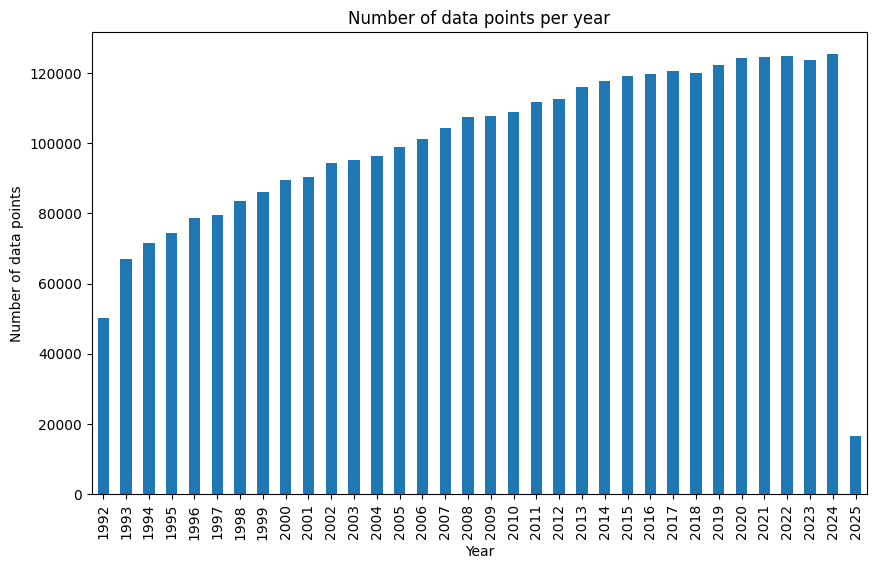

In [30]:
#count datapoints per year
plt.figure(figsize=(10, 6))
df_lagged['Date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of data points')
plt.title('Number of data points per year')
plt.show()

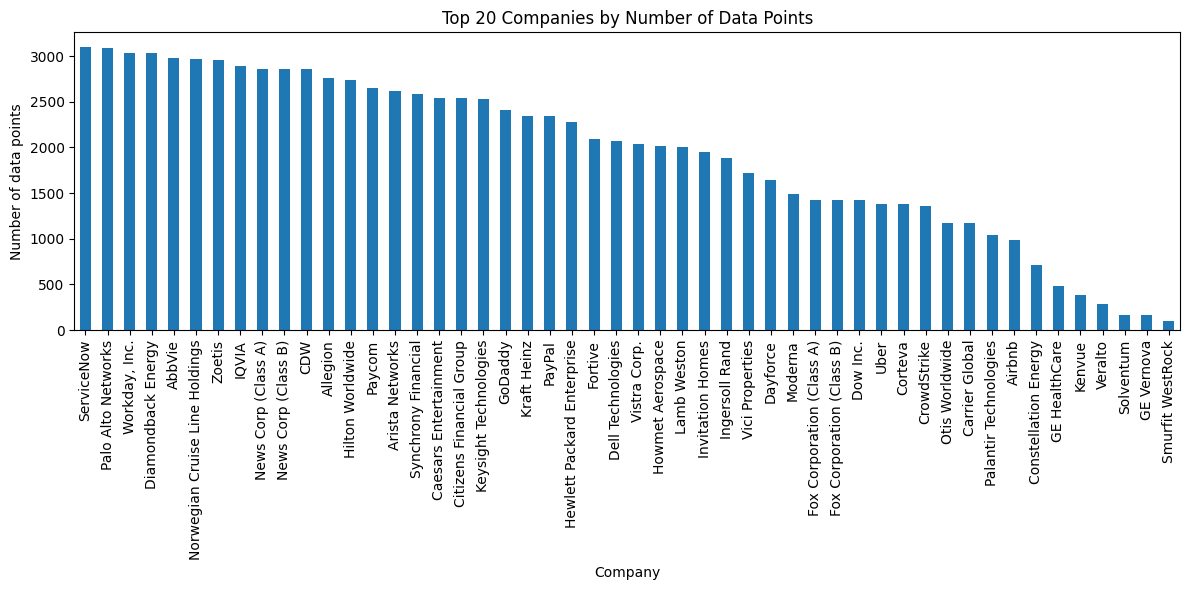

In [35]:
# Display only top 20 companies by data point count
plt.figure(figsize=(12, 6))
df_lagged['Name_idx'].value_counts().tail(50).plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Number of data points')
plt.title('Top 20 Companies by Number of Data Points')
plt.tight_layout()  # Helps with margin issues
plt.show()

In [36]:
#save df_lagged to csv
df_lagged.to_csv('ML_ready.csv', index=False)